In [1]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using Theano backend.
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


In [2]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [5]:
cd  Desktop/python_excel

C:\Users\fbaker\Desktop\python_excel


In [6]:
# load the dataset
dataframe = pandas.read_csv('price_ctr_nc.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset)*2 - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

dataframe.head()

267 132


,conversion_rate
0,0.2025
1,0.1907
2,0.1994
3,0.2249
4,0.2141


In [8]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)


# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [9]:

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=10, batch_size=1, verbose=2)

Epoch 1/10
9s - loss: 0.0073
Epoch 2/10
11s - loss: 0.0057
Epoch 3/10
10s - loss: 0.0054
Epoch 4/10
11s - loss: 0.0052
Epoch 5/10
10s - loss: 0.0049
Epoch 6/10
9s - loss: 0.0047
Epoch 7/10
9s - loss: 0.0046
Epoch 8/10
12s - loss: 0.0045
Epoch 9/10
11s - loss: 0.0043
Epoch 10/10
10s - loss: 0.0043


In [10]:

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.05 RMSE
Test Score: 0.04 RMSE


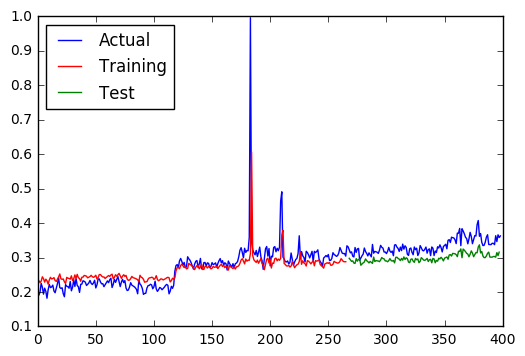

In [11]:

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
#test1=testPredictPlot.cumsum()
#plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset),label ='Actual', color='blue')
plt.plot(trainPredictPlot,label ='Training', color='red')
plt.plot(testPredictPlot,label ='Test',color='green')
plt.legend(loc=2)
plt.show()

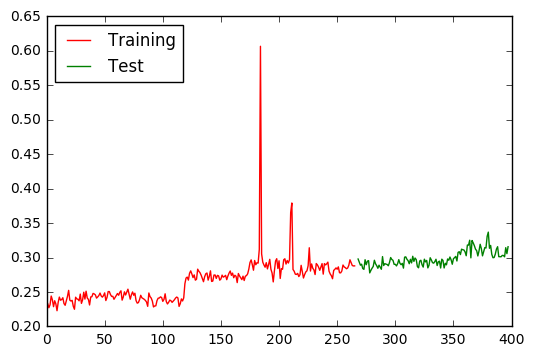

In [12]:
ax = plt.subplot(313)
plt.plot(scaler.inverse_transform(dataset),label ='Actual', color='blue')

ax = plt.subplot()

plt.plot(trainPredictPlot,label ='Training', color='red')
plt.plot(testPredictPlot,label ='Test',color='green')
plt.legend(loc=2)
plt.show()

In [3]:
var = testPredictPlot-scaler.inverse_transform(dataset)
ax = plt.subplot()

plt.plot(var,label ='Training', color='red')
#plt.plot(testPredictPlot,label ='Test',color='green')
plt.legend(loc=2)
plt.show()

NameError: name 'testPredictPlot' is not defined

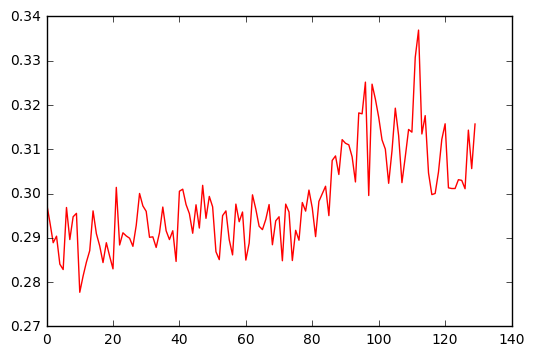

In [13]:
plt.plot(testPredict,label ='Training', color='red')

